<a href="https://colab.research.google.com/github/HoangSon2511/AI-Project/blob/main/RainPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fuzzy: filename=Fuzzy-1.2.2-cp37-cp37m-linux_x86_64.whl size=164002 sha256=17ed27611309b04ac329017410fea6204c8171fe2c694752bb75553f9751d5bf
  Stored in directory: /root/.cache/pip/wheels/c8/52/8a/bb2d05fbf343752a8546682cb5b2d775cc0d1f27f6c43f95dd
Successfully built fuzzy


In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=2346bb506cd94bc965a597ce4134cf62579cccd4331713c4ec448ef98ba64a44
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


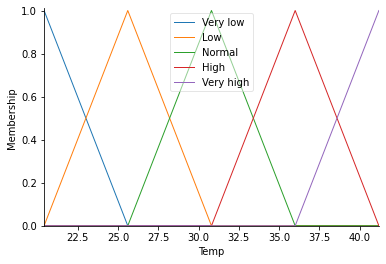

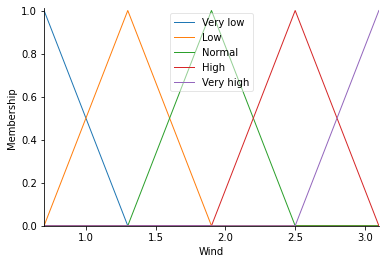

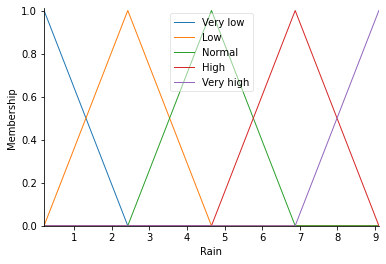

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
Temp = ctrl.Antecedent(np.linspace(20.4, 41.2, 5 ), 'Temp')
Wind = ctrl.Antecedent(np.linspace(0.7, 3.1, 5), 'Wind')
Rain = ctrl.Consequent(np.linspace(0.2, 9.1, 5), 'Rain')

names_Temp = ['Very low', 'Low', 'Normal', 'High','Very high']
names_Wind = ['Very low', 'Low', 'Normal', 'High','Very high']
names_Rain = ['Very low', 'Low', 'Normal', 'High','Very high']
Temp.automf(names=names_Temp)
Wind.automf(names=names_Wind)
Rain.automf(names=names_Rain)

Temp.view()
Wind.view()
Rain.view()

4.65


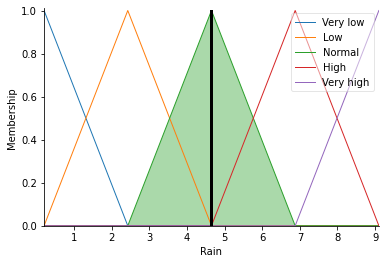

In [5]:
rule1 = ctrl.Rule(Wind['Very low'] & Temp['Very low'], Rain['Very low'])
rule2 = ctrl.Rule(Wind['Very low'] & Temp['Low'], Rain['Low'])
rule3 = ctrl.Rule(Wind['Very low'] & Temp['Normal'], Rain['Normal'])
rule4 = ctrl.Rule(Wind['Very low'] & Temp['High'], Rain['High'])
rule5 = ctrl.Rule(Wind['Very low'] & Temp['Very high'], Rain['Very high'])

rule6 = ctrl.Rule(Wind['Low'] & Temp['Very low'], Rain['Low'])
rule7 = ctrl.Rule(Wind['Low'] & Temp['Low'], Rain['Low'])
rule8 = ctrl.Rule(Wind['Low'] & Temp['Normal'], Rain['Normal'])
rule9 = ctrl.Rule(Wind['Low'] & Temp['High'], Rain['High'])
rule10 = ctrl.Rule(Wind['Low'] & Temp['Very high'], Rain['Very high'])

rule11 = ctrl.Rule(Wind['Normal'] & Temp['Very low'], Rain['Normal'])
rule12 = ctrl.Rule(Wind['Normal'] & Temp['Low'], Rain['Normal'])
rule13 = ctrl.Rule(Wind['Normal'] & Temp['Normal'], Rain['Normal'])
rule14 = ctrl.Rule(Wind['Normal'] & Temp['High'], Rain['High'])
rule15 = ctrl.Rule(Wind['Normal'] & Temp['Very high'], Rain['Very high'])

rule16 = ctrl.Rule(Wind['High'] & Temp['Very low'], Rain['High'])
rule17 = ctrl.Rule(Wind['High'] & Temp['Low'], Rain['High'])
rule18 = ctrl.Rule(Wind['High'] & Temp['Normal'], Rain['High'])
rule19 = ctrl.Rule(Wind['High'] & Temp['High'], Rain['High'])
rule20 = ctrl.Rule(Wind['High'] & Temp['Very high'], Rain['Very high'])

rule21 = ctrl.Rule(Wind['Very high'] & Temp['Very low'], Rain['Normal'])
rule22 = ctrl.Rule(Wind['Very high'] & Temp['Low'], Rain['Normal'])
rule23 = ctrl.Rule(Wind['Very high'] & Temp['Normal'], Rain['High'])
rule24 = ctrl.Rule(Wind['Very high'] & Temp['High'], Rain['Very high'])
rule25 = ctrl.Rule(Wind['Very high'] & Temp['Very high'], Rain['Very high'])

system_ctrl= ctrl.ControlSystem(rules=[rule1, rule1, rule2, rule3, rule4,
rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['Temp']=20
system.input['Wind']=4
system.compute()
print(system.output['Rain'])
Rain.view(sim=system)